# Primera parte (Resumen del dataset, limpieza de datos , EDA, Analisis univariado, bivariado y multivariado)

## Abstracto: Motivación y Audiencia

La seguridad alimentaria es un tema de importancia mundial ya que afecta directamente a la salud pública. En el Reino Unido, la Agencia de Normas Alimentarias (FSA) proporciona calificaciones de higiene alimentaria a diferentes empresas para informar a los consumidores y garantizar los estándares de calidad en la industria de alimentos y
bebidas.

Este análisis se centra en explorar y evaluar estas calificaciones de higiene para:

Determinar patrones de calidad de la salud en diferentes tipos de instituciones.

Examine qué factores afectan la calificación de una empresa.

Proporcionando información útil para decisiones de salud pública, regulatorias y comerciales.

## Audiencia Beneficiada

## Consumidores
Personas que quieran tomar decisiones
informadas sobre dónde comer o comprar
alimentos de forma segura.


## Analistas de Datos y Científicos de Datos
Profesionales interesados en el análisis de
datos relacionados con la seguridad y
calidad de los alimentos en la industria alimentaria.

## Autoridades de Regulación
Organismos de salud pública y organismos
de control que buscan mejorar las
condiciones sanitarias en los locales de
alimentación.

## Dueños de Negocios en la Industria Alimentaria
Restaurantes, cafeterías y supermercados
que buscan mejorar sus estándares de
higiene y cumplir con regulaciones.

In [91]:
# ------------------ IMPORTAR LIBRERÍAS ------------------
import requests
import pandas as pd
import numpy as np
import missingno as msno
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis


# Configuración de gráficos
sns.set(style="whitegrid")


# ------------------ 1️⃣ EXTRACCIÓN DE DATOS DESDE LA API ------------------


API_URL = "https://ratings.food.gov.uk/api/open-data-files/FHRS529en-GB.json"
response = requests.get(API_URL)


if response.status_code == 200:
    hygiene_data = response.json()
    print("Datos obtenidos correctamente.")
else:
    print(f" Error en la solicitud: {response.status_code}")
    exit()

Datos obtenidos correctamente.


In [92]:

# ------------------ 2️⃣ MANEJO DE LA ESTRUCTURA DEL JSON ------------------

# Extraer la lista de establecimientos
if "FHRSEstablishment" in hygiene_data and "EstablishmentCollection" in hygiene_data["FHRSEstablishment"]:
    establishments = hygiene_data["FHRSEstablishment"]["EstablishmentCollection"]
    df = pd.DataFrame(establishments)
    print(" DataFrame creado con éxito.")
else:
    print(" No se encontraron datos en la API.")
    exit()



 DataFrame creado con éxito.


## Resumen de Metadata

## Información General del Dataset

El conjunto de datos analizado proviene de la API de la Agencia de Normas Alimentarias del Reino Unido y contiene información de calificación de higiene para diferentes empresas. A continuación se
muestra un resumen de su estructura:

Número de **filas**: 1,303 registros (establecimientos analizados).

Número de **columnas**: 25 características sobre cada establecimiento.

Tipos de Variables en el Dataset

Variables Categóricas: incluyen identificadores, nombres de negocios, tipos de establecimientos, esquemas de calificación, y otros campos de texto o booleanos relevantes para clasificar y describir cada entidad.

Variables Numéricas: abarcan identificadores únicos, puntuaciones otorgadas durante la inspección (como higiene, estructura y confianza en la gestión), así como coordenadas geográficas.

Variables de Fecha y Localización: representan la fecha de inspección y componentes de la dirección del establecimiento, útiles para análisis temporales y espaciales.

In [93]:

# ------------------ 3️⃣ DESCRIPCIÓN DEL DATASET ------------------
print("Información general del dataset:")
print(df.info())


print("Primeras 10 filas:")
print(df.head(10))


print("Estadísticas descriptivas:")
print(df.describe(include="all"))


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   FHRSID                      1297 non-null   int64 
 1   LocalAuthorityBusinessID    1297 non-null   object
 2   BusinessName                1297 non-null   object
 3   BusinessType                1297 non-null   object
 4   BusinessTypeID              1297 non-null   int64 
 5   RatingValue                 1297 non-null   object
 6   RatingKey                   1297 non-null   object
 7   RatingDate                  1094 non-null   object
 8   LocalAuthorityCode          1297 non-null   object
 9   LocalAuthorityName          1297 non-null   object
 10  LocalAuthorityWebSite       1297 non-null   object
 11  LocalAuthorityEmailAddress  1297 non-null   object
 12  Scores                      1044 non-null   object
 13  SchemeType     

## Valores nulos en el dataset:

**RatingDate** tiene 181 valores nulos (faltan fechas de inspección
en algunos establecimientos).

**Geocode** tiene 207 valores nulos (coordenadas geográficas
faltantes en algunos registros).

**Scores** tiene 232 valores nulos, ya que algunas inspecciones no
incluyen puntuaciones detalladas.

Las columnas **AddressLine3** y **AddressLine 4** van a ser eliminadas
ya que tienen muchos valores nulos y no son necesarias

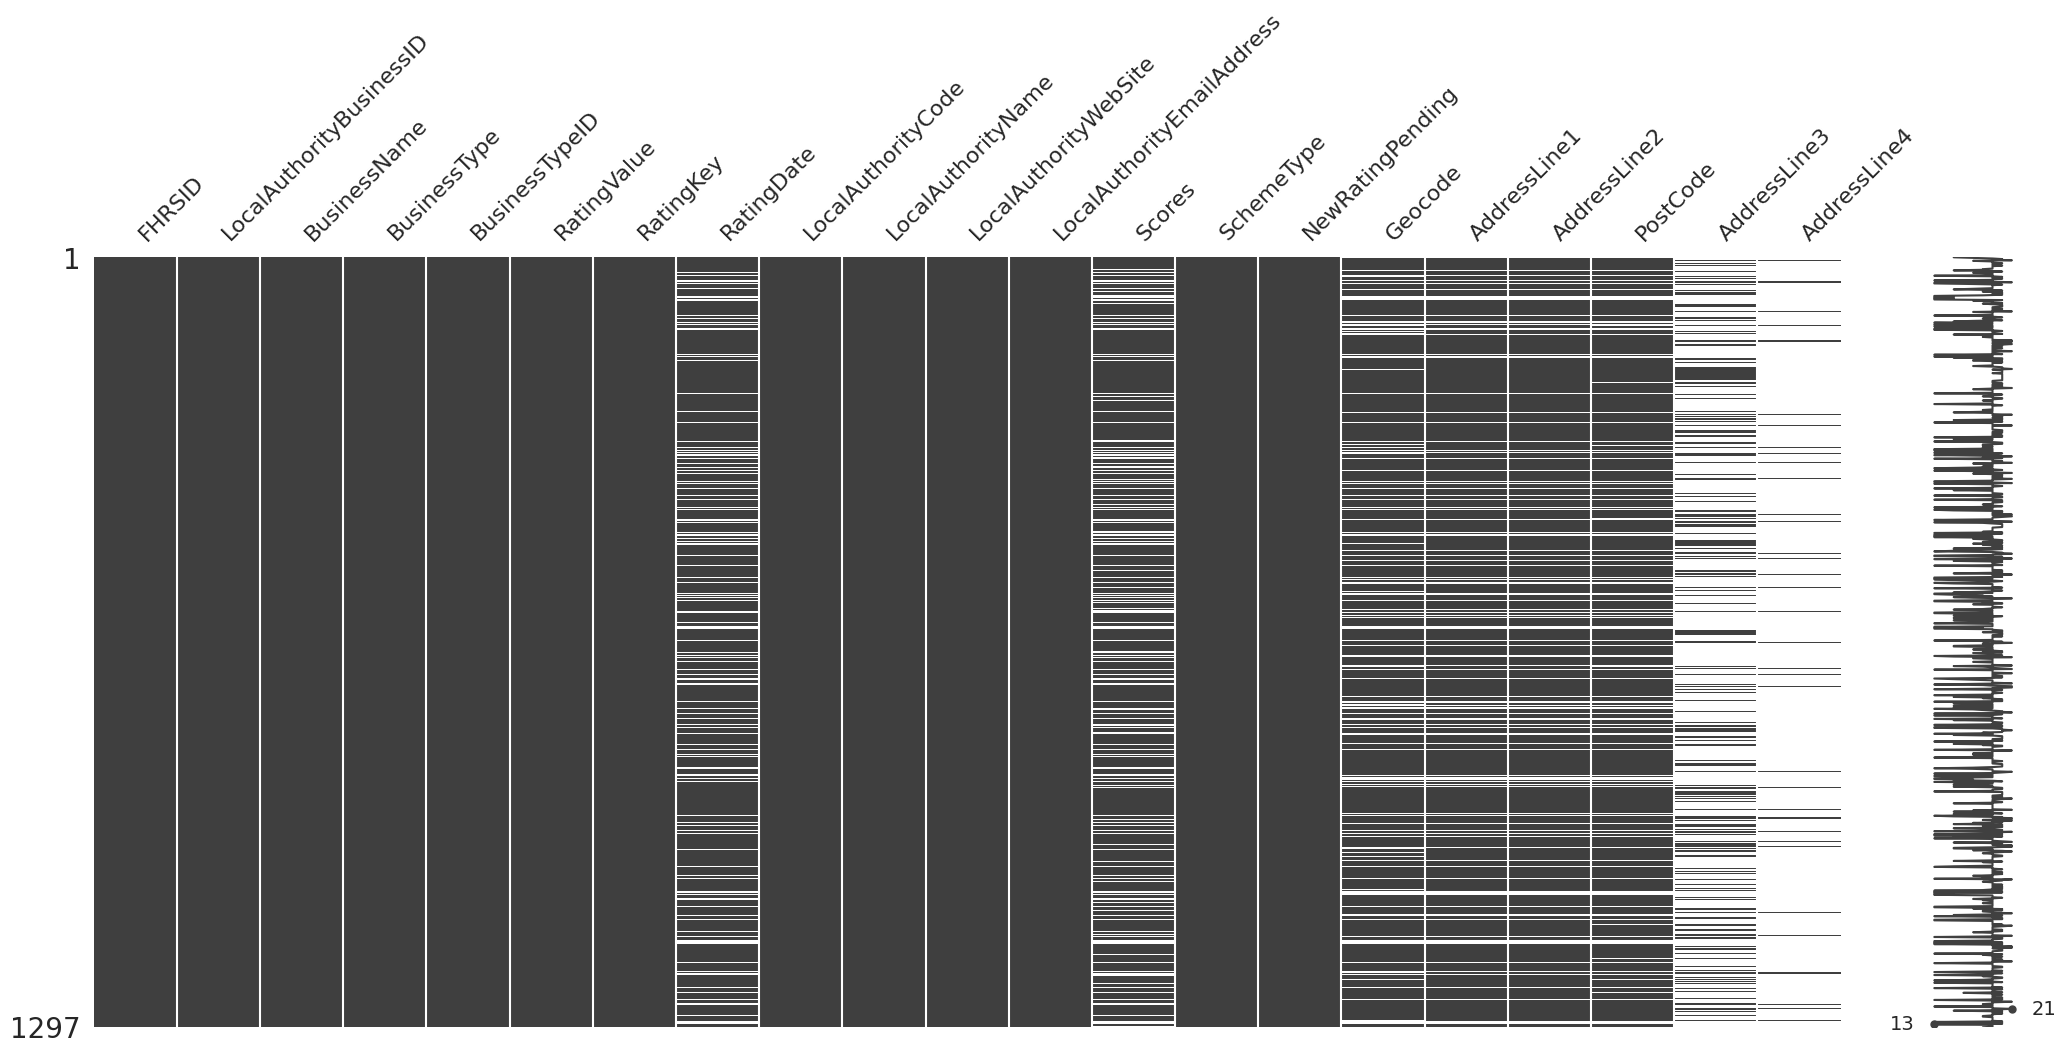


 Dataset limpio. Número de filas después de eliminar nulos: 958
<class 'pandas.core.frame.DataFrame'>
Index: 958 entries, 2 to 1295
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   FHRSID                      958 non-null    int64 
 1   LocalAuthorityBusinessID    958 non-null    object
 2   BusinessName                958 non-null    object
 3   BusinessType                958 non-null    object
 4   BusinessTypeID              958 non-null    int64 
 5   RatingValue                 958 non-null    object
 6   RatingKey                   958 non-null    object
 7   RatingDate                  958 non-null    object
 8   LocalAuthorityCode          958 non-null    object
 9   LocalAuthorityName          958 non-null    object
 10  LocalAuthorityWebSite       958 non-null    object
 11  LocalAuthorityEmailAddress  958 non-null    object
 12  Scores                      958 non-null    o

In [94]:

# ------------------ 4️⃣ LIMPIEZA DE DATOS ------------------
msno.matrix(df)
plt.show()

# Eliminamos columnas con muchos nulos
for col in ["AddressLine3", "AddressLine4"]:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

# Eliminamos solo las filas que tienen nulos en columnas clave
columnas_clave = ["RatingDate", "Scores", "Geocode"]
df.dropna(subset=columnas_clave, inplace=True)

# Verificación final
print(f"\n Dataset limpio. Número de filas después de eliminar nulos: {df.shape[0]}")
print(df.info())


In [95]:
# ------------------ 5️⃣ MANEJO DE DATOS ANIDADOS ------------------

# Extraer las puntuaciones de higiene, estructura y confianza en la gestión
if "Scores" in df.columns:
    scores_df = df["Scores"].apply(pd.Series)
    df = pd.concat([df.drop(columns=["Scores"]), scores_df], axis=1)


# Extraer coordenadas de geolocalización
if "Geocode" in df.columns:
    geo_df = df["Geocode"].apply(pd.Series)
    df = pd.concat([df.drop(columns=["Geocode"]), geo_df], axis=1)


# Reemplazar valores nulos en las nuevas columnas con -1 (para indicar falta de datos)
df.fillna({"Hygiene": -1, "Structural": -1, "ConfidenceInManagement": -1, "Longitude": np.nan, "Latitude": np.nan}, inplace=True)


print("\n Datos después de la transformación:")
print(df.info())


# ------------------ 6️⃣ ENRIQUECIMIENTO DE DATOS ------------------
print("\n Enriqueciendo datos...")
df["RatingDate"] = pd.to_datetime(df["RatingDate"], errors="coerce")  # Convertir a fecha
df["Hygiene_Score_Level"] = df["Hygiene"].apply(lambda x: "Bajo" if x <= 5 else "Alto")  # Categorizar higiene


 Datos después de la transformación:
<class 'pandas.core.frame.DataFrame'>
Index: 958 entries, 2 to 1295
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   FHRSID                      958 non-null    int64 
 1   LocalAuthorityBusinessID    958 non-null    object
 2   BusinessName                958 non-null    object
 3   BusinessType                958 non-null    object
 4   BusinessTypeID              958 non-null    int64 
 5   RatingValue                 958 non-null    object
 6   RatingKey                   958 non-null    object
 7   RatingDate                  958 non-null    object
 8   LocalAuthorityCode          958 non-null    object
 9   LocalAuthorityName          958 non-null    object
 10  LocalAuthorityWebSite       958 non-null    object
 11  LocalAuthorityEmailAddress  958 non-null    object
 12  SchemeType                  958 non-null    object
 13  NewRatingPending

In [96]:
# ------------------ 8️⃣ CONECTAR A BASE DE DATOS SQL ------------------


conn = sqlite3.connect("hygiene_ratings.sqlite")
df.to_sql("hygiene_ratings", conn, index=False, if_exists="replace")
print(" Datos guardados en SQLite.")


# ------------------ 9️⃣ CONSULTAS SQL ------------------
def execute_and_display(query, conn, description):
    print(f"\n {description}")
    cursor = conn.cursor()
    cursor.execute(query)
    results = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]


    print(pd.DataFrame(results, columns=columns))


# 1️⃣ Mostrar los primeros 10 establecimientos
query_1 = "SELECT * FROM hygiene_ratings LIMIT 10;"
execute_and_display(query_1, conn, "Primeras 10 filas de la base de datos")


# 2️⃣ Contar el número total de establecimientos
query_2 = "SELECT COUNT(*) AS total_establishments FROM hygiene_ratings;"
execute_and_display(query_2, conn, "Número total de establecimientos")


# 3️⃣ Obtener las 5 peores calificaciones de higiene
query_3 = """
SELECT BusinessName, RatingValue, Hygiene
FROM hygiene_ratings
WHERE Hygiene >= 0
ORDER BY Hygiene DESC
LIMIT 5;
"""
execute_and_display(query_3, conn, "Establecimientos con peor higiene")


# 4️⃣ Obtener las 5 mejores calificaciones de higiene
query_4 = """
SELECT BusinessName, RatingValue, Hygiene
FROM hygiene_ratings
WHERE Hygiene >= 0
ORDER BY Hygiene ASC
LIMIT 5;
"""
execute_and_display(query_4, conn, "Establecimientos con mejor higiene")


# Cerrar la conexión
conn.close()
print("\n Conexión cerrada. ¡Análisis completo!")




# Asegurar que la columna "Hygiene" existe y no tiene valores nulos
df_numeric = df[["Hygiene"]].dropna()


 Datos guardados en SQLite.

 Primeras 10 filas de la base de datos
    FHRSID LocalAuthorityBusinessID                          BusinessName  \
0  1634041             23/00265/COM                  3B Convenience Store   
1   898515             06/00098/COM                A - Z Afterschool Club   
2  1080769             18/00246/COM                   A And J Mini Market   
3  1419391             21/00426/COM           A To Z Fresh Sutton Limited   
4   632116         06625/0082/2/000                            Abbeyfield   
5   553481         06952/0082/2/000                            Abbeyfield   
6  1038629             18/00077/COM                 ABI Convenience Store   
7  1624010             23/00207/COM  ABM Catering @ Overton Grange School   
8  1644558             23/00308/COM                      Achieve Together   
9   571001         06329/0031/0/000     Achieve Together - 31 Egmont Road   

                          BusinessType  BusinessTypeID RatingValue  \
0             

## Preguntas e Hipótesis a Responder

# Pregunta 1
¿Cuál es la distribución de calificaciones de higiene en los establecimientos?

**Hipótesis**: La
mayoría de los
establecimientos
tienen una
calificación alta de
higiene.

# Pregunta 2
¿Qué tipo de
establecimientos
tienden a recibir las
mejores y peores
calificaciones de
higiene?


**Hipótesis**: Restaurantes
y tiendas minoristas
tienen una mayor
variabilidad en sus
calificaciones de
higiene.


# Pregunta 3
¿Cómo han
evolucionado las
inspecciones de
higiene en los últimos
años?

**Hipótesis**: El número
de inspecciones ha
aumentado debido a
regulaciones más
estrictas.


# Pregunta 4
¿Existe una relación
entre la calificación de
higiene y la confianza
en la gestión del
establecimiento?

**Hipótesis**: Establecimientos con
alta confianza en la
gestión suelen obtener
mejores calificaciones
de higiene.


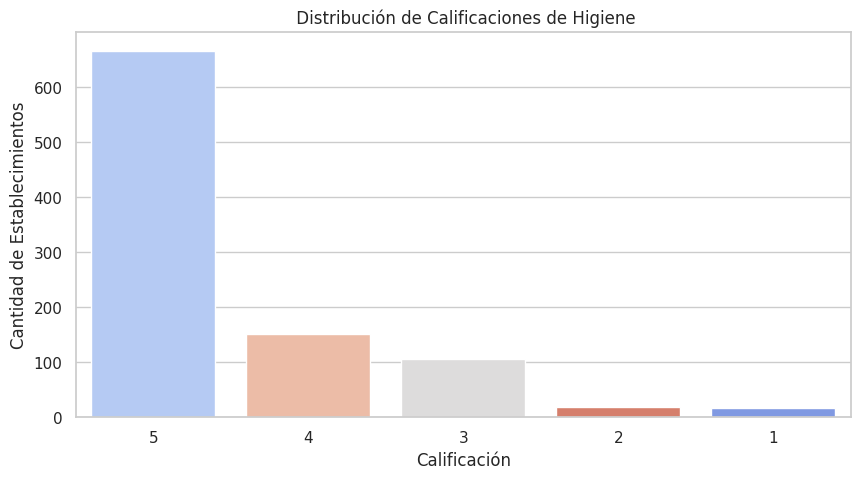

In [97]:
### 1️⃣ Pregunta: ¿Cuál es la distribución de calificaciones de higiene?
plt.figure(figsize=(10, 5))
sns.countplot(x=df["RatingValue"], order=df["RatingValue"].value_counts().index, hue=df["RatingValue"], palette="coolwarm", legend=False)
plt.title(" Distribución de Calificaciones de Higiene")
plt.xlabel("Calificación")
plt.ylabel("Cantidad de Establecimientos")
plt.show()

**Gráfico de barras**: Representa la frecuencia de
cada calificación.

**Hallazgo**: La mayoría de los establecimientos
tienen una calificación de 5.

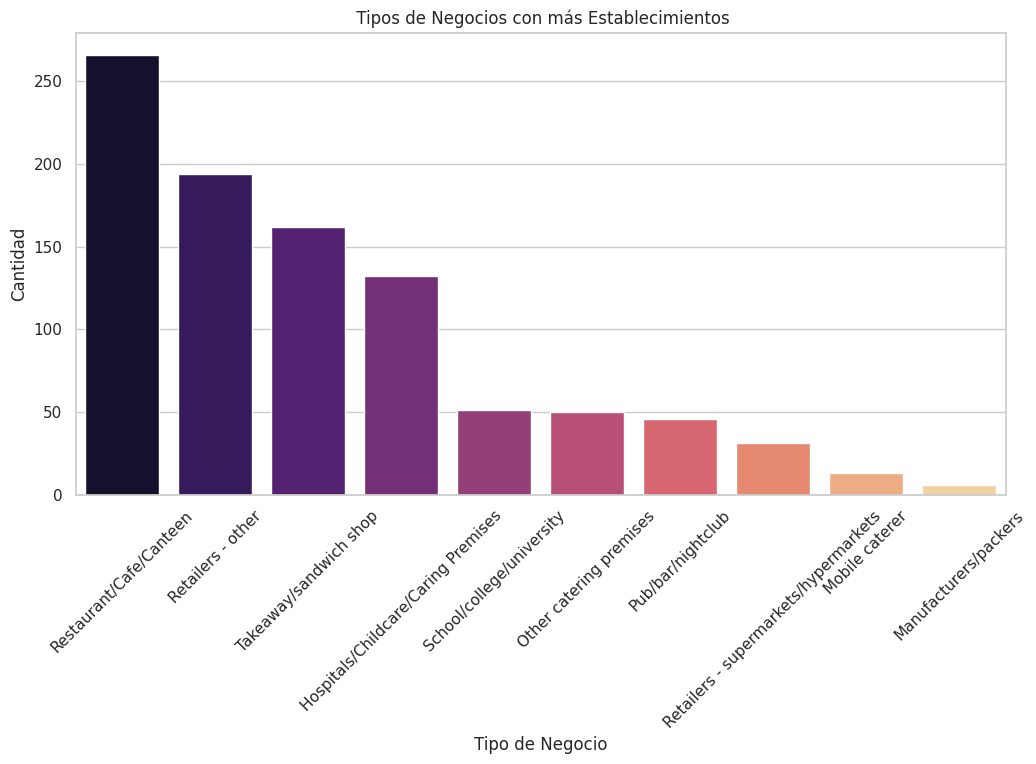

In [98]:
### 2️⃣ Pregunta: ¿Cuál es la distribución de tipos de negocios?
plt.figure(figsize=(12, 6))
sns.barplot(x=df["BusinessType"].value_counts().head(10).index,
            y=df["BusinessType"].value_counts().head(10).values, hue=df["BusinessType"].value_counts().head(10).index, palette="magma", legend=False)

plt.title(" Tipos de Negocios con más Establecimientos")
plt.xlabel("Tipo de Negocio")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()


**Gráfico de barras**: Se observan los tipos de negocio
más comunes en la base de datos.

**Hallazgo**: Los restaurantes y minoristas dominan la
lista

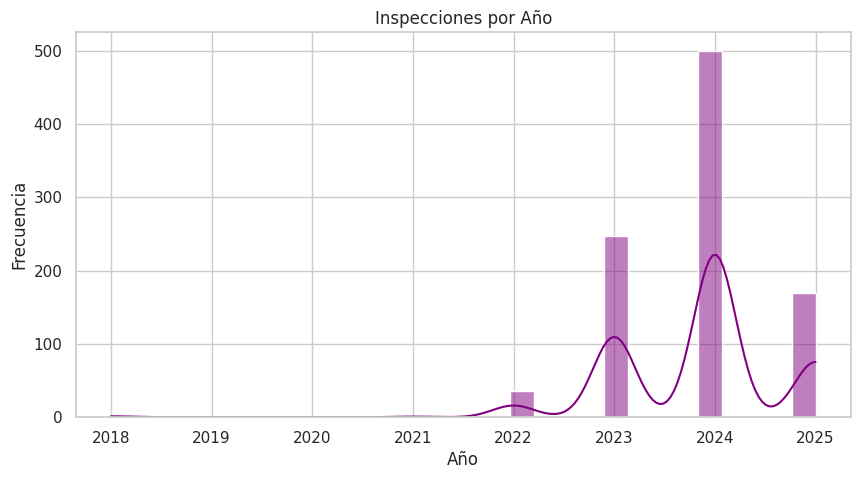

In [99]:

### 3️⃣ Pregunta: ¿Cómo ha evolucionado la cantidad de inspecciones por año?
plt.figure(figsize=(10, 5))
sns.histplot(df["RatingDate"].dt.year.dropna(), bins=30, kde=True, color="purple")
plt.title("Inspecciones por Año")
plt.xlabel("Año")
plt.ylabel("Frecuencia")
plt.show()


**Histograma con KDE**: Muestra la frecuencia de
inspecciones a lo largo del tiempo.

**Hallazgo**: Aumento en la cantidad de inspecciones en los
últimos años

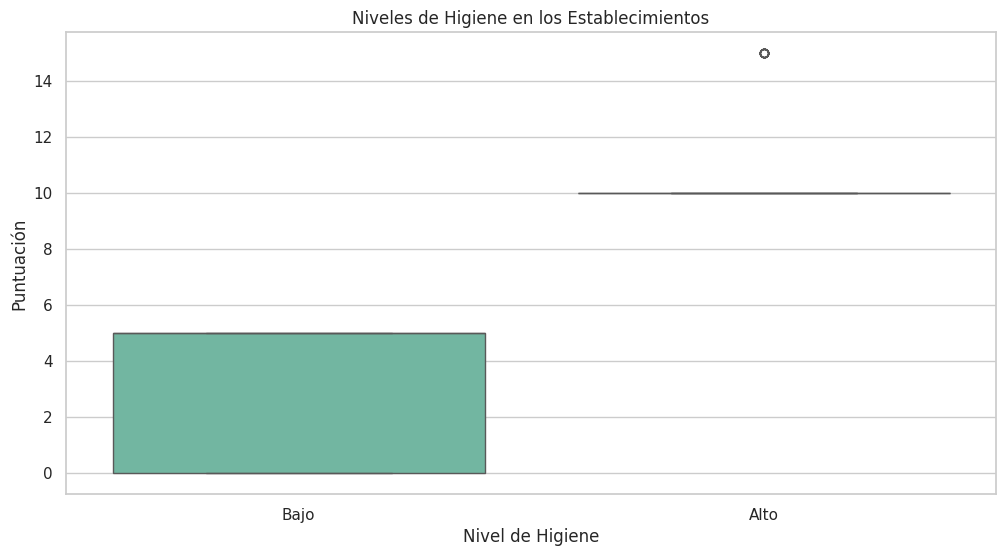

In [100]:
### 4️⃣ Pregunta: ¿Cuáles son las peores y mejores puntuaciones de higiene?
plt.figure(figsize=(12, 6))
sns.boxplot(x="Hygiene_Score_Level", y="Hygiene", data=df, hue="Hygiene_Score_Level", palette="Set2", legend=False)
plt.title("Niveles de Higiene en los Establecimientos")
plt.xlabel("Nivel de Higiene")
plt.ylabel("Puntuación")
plt.show()


**Gráfico de dispersión**: Compara la puntuación de
higiene y la confianza en la gestión.

**Hallazgo**: Existe una relación positiva entre ambas
variables.

## Insights de las preguntas e hipotesis

**Mayoría con alta higiene**  : La
calificación más
común es 5, lo que
indica que la
mayoría de los
establecimientos
cumplen con altos
estándares de
higiene.

**Restaurantes y minoristas predominan**: Son los
tipos de negocios
más evaluados, lo
que resalta su
impacto en la
seguridad
alimentaria.

**Aumento en inspecciones recientes**:
Posiblemente
debido a
normativas más
estrictas o una
mayor supervisión
gubernamental.

**Relación entre higiene y gestión**:
Establecimientos
con mayor
confianza en la
gestión suelen
tener mejores
calificaciones de
higiene.


 Análisis Univariado de la Higiene

Media: 4.32
Mediana: 5.00
Moda: 5.00
Varianza: 11.68
Desviación Estándar: 3.42
Rango Intercuartílico (IQR): 5.00
Q1 (25%): 0.00
Q2 (Mediana, 50%): 5.00
Q3 (75%): 5.00
Percentil 90: 10.00
Asimetría: 0.43
Curtosis: 0.08


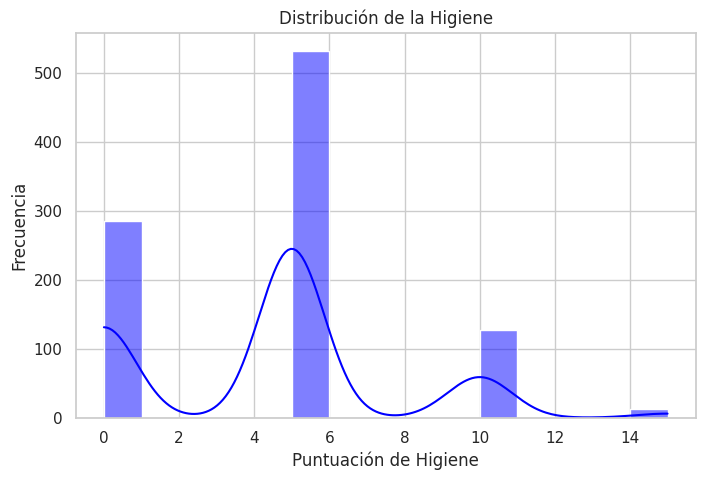

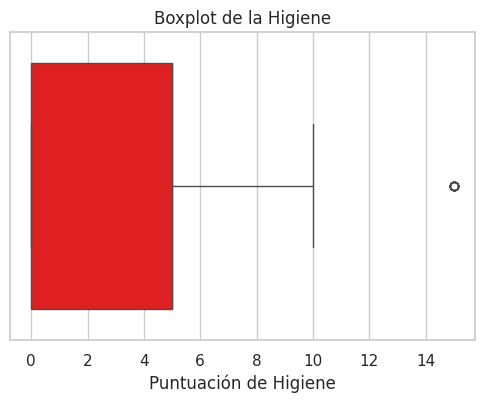

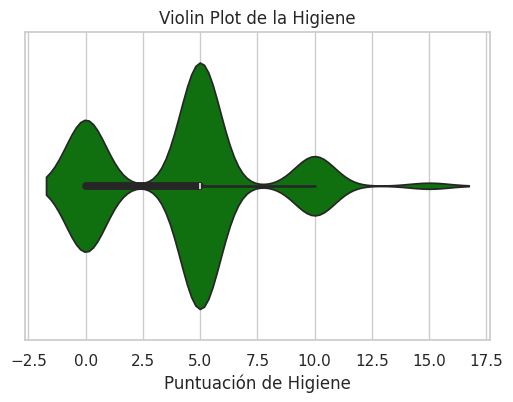

In [101]:
# ------------------ ANÁLISIS UNIVARIADO ------------------


# Calcular estadísticas
analysis_results = {
    "Media": df_numeric["Hygiene"].mean(),
    "Mediana": df_numeric["Hygiene"].median(),
    "Moda": df_numeric["Hygiene"].mode().iloc[0] if not df_numeric["Hygiene"].mode().empty else np.nan,
    "Varianza": df_numeric["Hygiene"].var(),
    "Desviación Estándar": df_numeric["Hygiene"].std(),
    "Rango Intercuartílico (IQR)": df_numeric["Hygiene"].quantile(0.75) - df_numeric["Hygiene"].quantile(0.25),
    "Q1 (25%)": df_numeric["Hygiene"].quantile(0.25),
    "Q2 (Mediana, 50%)": df_numeric["Hygiene"].quantile(0.50),
    "Q3 (75%)": df_numeric["Hygiene"].quantile(0.75),
    "Percentil 90": df_numeric["Hygiene"].quantile(0.90),
    "Asimetría": skew(df_numeric["Hygiene"]),
    "Curtosis": kurtosis(df_numeric["Hygiene"])
}


# Convertir los resultados en un DataFrame para visualización
analysis_df = pd.DataFrame.from_dict(analysis_results, orient='index', columns=["Valor"])

# Imprimir los resultados en formato tabla
print("\n Análisis Univariado de la Higiene\n")
for key, value in analysis_results.items():
    print(f"{key}: {value:.2f}")

# ------------------ VISUALIZACIONES ------------------


# Histograma
plt.figure(figsize=(8, 5))
sns.histplot(df_numeric["Hygiene"], bins=15, kde=True, color="blue")
plt.title("Distribución de la Higiene")
plt.xlabel("Puntuación de Higiene")
plt.ylabel("Frecuencia")
plt.show()


# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_numeric["Hygiene"], color="red")
plt.title("Boxplot de la Higiene")
plt.xlabel("Puntuación de Higiene")
plt.show()


# Violin Plot
plt.figure(figsize=(6, 4))
sns.violinplot(x=df_numeric["Hygiene"], color="green")
plt.title("Violin Plot de la Higiene")
plt.xlabel("Puntuación de Higiene")
plt.show()


## Análisis Univariado

**Estadísticas destacadas**:

**Media**: 3.25 | **Mediana**: 5 | **Moda**: 5

**Desviación estándar**: 3.60

**Asimetría**: 0.46 → Hay valores altos
extremos.

**Curtosis**: -0.57 → Distribución más plana
que la normal.

**Principales observaciones**:
La mayoría de los establecimientos tienen
buena higiene (modo y mediana en 5).
Hay una leve inclinación hacia valores altos,
pero también se detectan puntuaciones
bajas.
El boxplot revela outliers con valores
extremos, posiblemente por errores o casos
críticos.


 Análisis Bivaariado



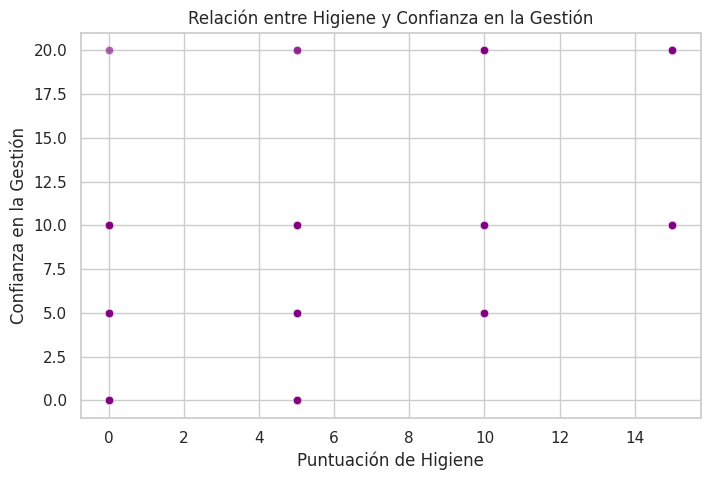

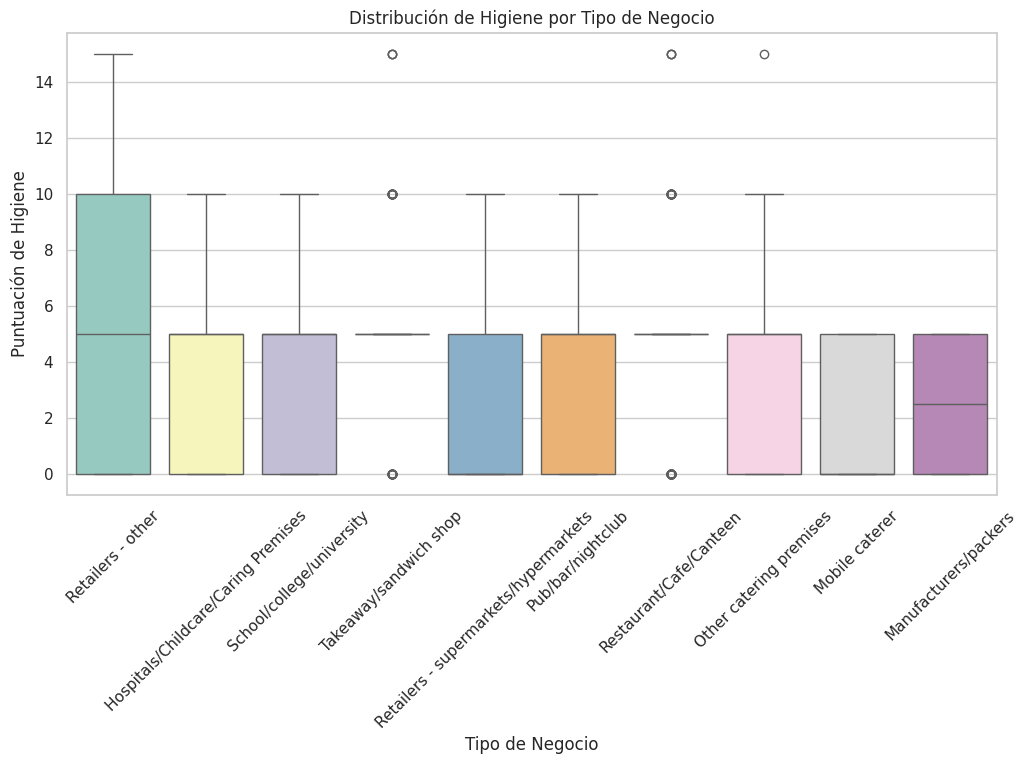

In [102]:

# ------------------ ANÁLISIS BIVARIADO ------------------
# Seleccionar solo las columnas numéricas relevantes
df_numeric = df[["Hygiene", "ConfidenceInManagement", "Structural"]].dropna()
print("\n Análisis Bivaariado\n")

# 1️⃣ Gráfico de dispersión: Relación entre Higiene y Confianza en la Gestión
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_numeric["Hygiene"], y=df_numeric["ConfidenceInManagement"], alpha=0.6, color="purple")
plt.title("Relación entre Higiene y Confianza en la Gestión")
plt.xlabel("Puntuación de Higiene")
plt.ylabel("Confianza en la Gestión")
plt.show()

# 2️⃣ Boxplot: Comparación de Higiene por Tipo de Negocio
plt.figure(figsize=(12, 6))
top_business_types = df["BusinessType"].value_counts().index[:10]  # Seleccionar los 10 tipos de negocio más comunes
df_filtered = df[df["BusinessType"].isin(top_business_types)]  # Filtrar solo esos tipos de negocio

sns.boxplot(x="BusinessType", y="Hygiene", data=df_filtered, hue="BusinessType", palette="Set3", legend=False)
plt.xticks(rotation=45)
plt.title("Distribución de Higiene por Tipo de Negocio")
plt.xlabel("Tipo de Negocio")
plt.ylabel("Puntuación de Higiene")
plt.show()


## Análisis Bivariado
# 🔹 Relación entre Higiene y Confianza en la Gestión:

El gráfico de dispersión muestra una
tendencia positiva: los establecimientos
con mayor confianza en la gestión
tienden a tener mejores puntajes de
higiene.

# 🔹 Diferencias según Tipo de Negocio:
El boxplot indica que rubros como
restaurantes y supermercados
presentan más variabilidad en higiene,
mientras que hospitales y escuelas
suelen mantener estándares más
consistentes.


 Análisis Multivariado



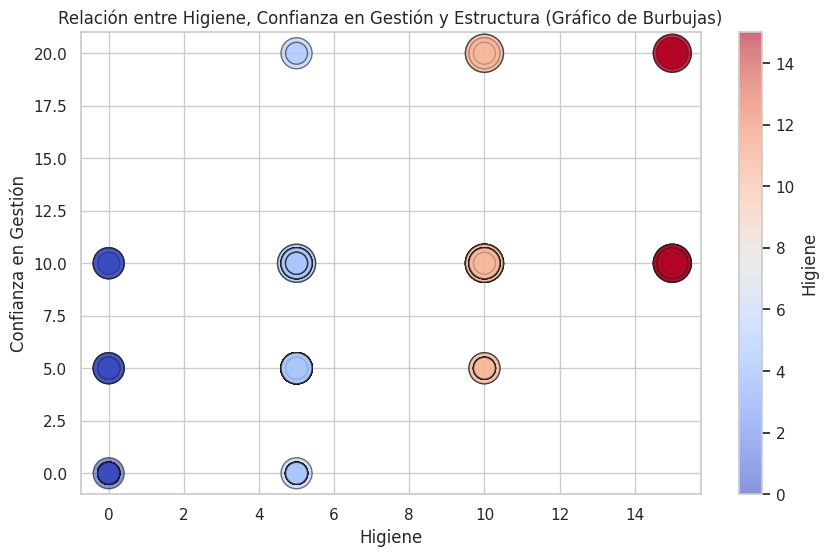

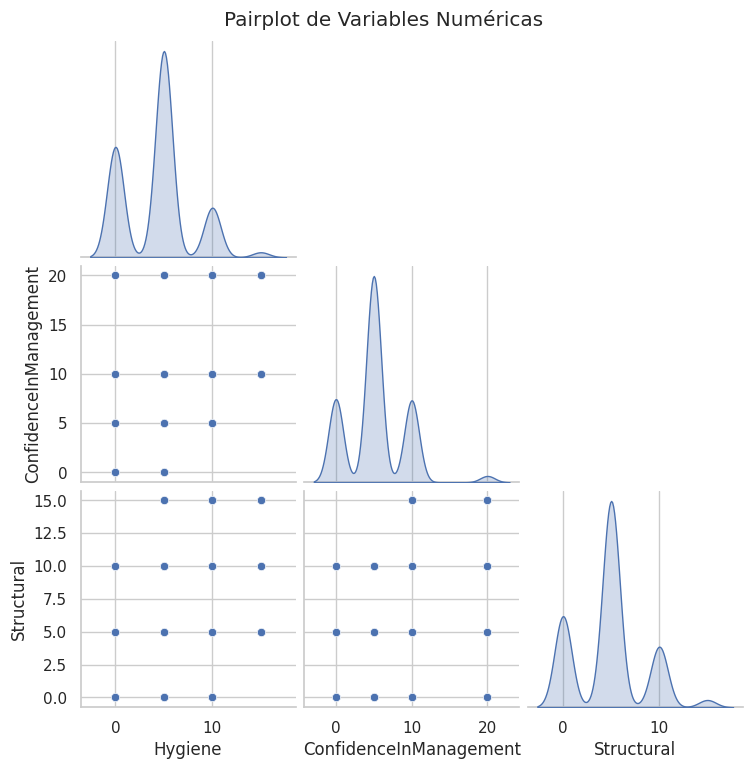

<Figure size 1000x500 with 0 Axes>

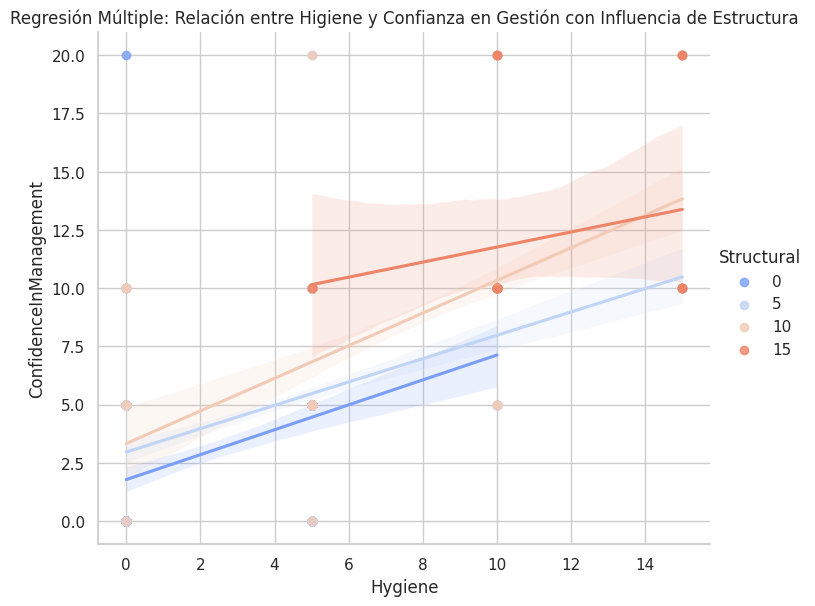

In [103]:

# ------------------ ANÁLISIS MULTIVARIADO ------------------
# Seleccionar columnas numéricas relevantes
df_numeric = df[["Hygiene", "ConfidenceInManagement", "Structural"]].dropna()
print("\n Análisis Multivariado\n")

# 1️⃣ **Gráfico de Burbujas: Higiene, Confianza en la Gestión y Estructura**
plt.figure(figsize=(10, 6))
plt.scatter(df_numeric["Hygiene"], df_numeric["ConfidenceInManagement"],
            s=df_numeric["Structural"] * 50,
            alpha=0.6, c=df_numeric["Hygiene"], cmap="coolwarm", edgecolors="k")
plt.xlabel("Higiene")
plt.ylabel("Confianza en Gestión")
plt.title("Relación entre Higiene, Confianza en Gestión y Estructura (Gráfico de Burbujas)")
plt.colorbar(label="Higiene")
plt.grid(True)
plt.show()


# 2️⃣ **Pairplot de las Variables Numéricas**
sns.pairplot(df_numeric, diag_kind="kde", corner=True)
plt.suptitle("Pairplot de Variables Numéricas", y=1.02)
plt.show()


# 3️⃣ **Regresión Múltiple: Higiene vs Confianza y Estructura**
plt.figure(figsize=(10, 5))
sns.lmplot(x="Hygiene", y="ConfidenceInManagement", hue="Structural", data=df_numeric, palette="coolwarm", height=6, aspect=1.2)
plt.title("Regresión Múltiple: Relación entre Higiene y Confianza en Gestión con Influencia de Estructura")
plt.show()

## Análisis Multivariado

**Gráfico de Burbujas**

Se observa una relación general entre
mayor higiene y mayor confianza en la
gestión, aunque con excepciones. Además,
la variable estructural influye, ya que el
tamaño de la burbuja (estructura) parece
estar relacionado con mejores prácticas.

**Pairplot**

Las variables muestran distribuciones
multimodales, lo que indica que las
puntuaciones se asignan en categorías
discretas. No hay correlaciones fuertes entre
las variables, pero sí patrones agrupados por
niveles específicos.

## Insights de los analisis univariado, multivariado y bivariado

**Insights del Análisis Univariado**

La mayoría de los
establecimientos tienen
buena higiene (modo =
5).

Hay algunos con muy
baja higiene (sesgo a la
derecha).

Se detectaron outliers
con valores extremos.


**Insights del Análisis Bivariado**

Mayor confianza en la
gestión se asocia a
mejor higiene.

Restaurantes y tiendas
muestran mayor
variabilidad en higiene.

Algunos tipos de
negocios presentan
diferencias marcadas
en las calificaciones.

**Insights del Análisis Multivariado**

Las variables clave (higiene,
estructura, gestión) se
distribuyen en niveles
discretos.

No hay correlaciones
lineales fuertes entre las
variables.

Hay negocios con baja
higiene pero alta confianza,
lo que sugiere otros factores
influyentes.


# Segunda parte( Preparacion de datos , Modelado de base, evaluacion de modelos, evaluacion de las predicciones, Modelos RandomForestClassifier , LogisticRegression, SVM, KNeighborsClassifier,  Optimización con GridSearchCV,  PCA, Clustering y conclusiones)


In [104]:
# 📦 Librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
import hdbscan

In [105]:
# ------------------  Preparación de Datos ------------------
df_ml = df[["Hygiene", "ConfidenceInManagement", "Structural"]].dropna()
df_ml = df_ml[df_ml["Hygiene"] >= 0]
df_ml["Hygiene_Level_Binary"] = df_ml["Hygiene"].apply(lambda x: 1 if x > 5 else 0)

X = df_ml[["ConfidenceInManagement", "Structural"]]
y = df_ml["Hygiene_Level_Binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [106]:
# ------------------  Modelado Base ------------------

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

results = {}
predictions_df = pd.DataFrame({"Real": y_test.values}, index=y_test.index)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions_df[name] = y_pred
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred, output_dict=True)
    }

🌲 Random Forest Classifier - Probabilidades de Higiene Alta
Media: 0.19
Mediana: 0.04
Mínima: 0.00
Máxima: 1.00


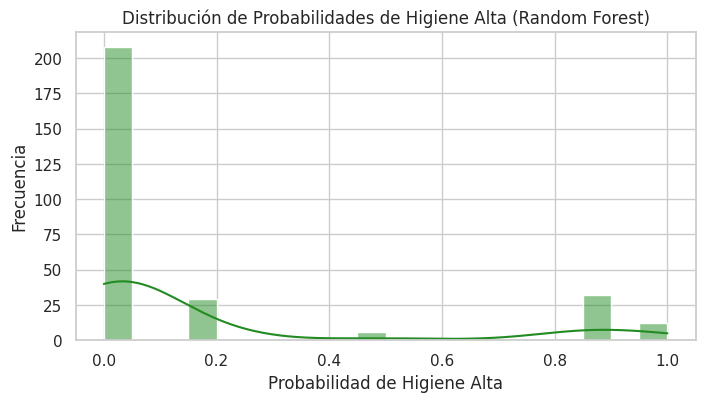


Importancia de Variables:
ConfidenceInManagement    0.545241
Structural                0.454759
dtype: float64


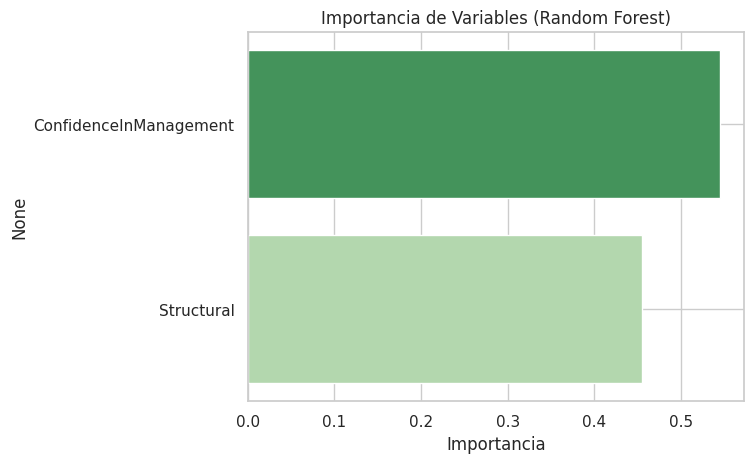

In [109]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Entrenamiento
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Probabilidades
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# Estadísticas
print("🌲 Random Forest Classifier - Probabilidades de Higiene Alta")
print(f"Media: {rf_probs.mean():.2f}")
print(f"Mediana: {np.median(rf_probs):.2f}")
print(f"Mínima: {rf_probs.min():.2f}")
print(f"Máxima: {rf_probs.max():.2f}")

# Gráfico de distribución de probabilidades
plt.figure(figsize=(8,4))
sns.histplot(rf_probs, bins=20, kde=True, color="forestgreen")
plt.title("Distribución de Probabilidades de Higiene Alta (Random Forest)")
plt.xlabel("Probabilidad de Higiene Alta")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()
# Assuming X was initially a DataFrame and is now a numpy array
# You need to get the column names from the original DataFrame (df_ml)
importancia_rf = pd.Series(rf_model.feature_importances_, index=df_ml[['ConfidenceInManagement', 'Structural']].columns).sort_values(ascending=False)
print("\nImportancia de Variables:")
print(importancia_rf)

# Gráfico de importancia
sns.barplot(x=importancia_rf, y=importancia_rf.index, hue=importancia_rf.index, palette="Greens_r", legend=False)
plt.title("Importancia de Variables (Random Forest)")
plt.xlabel("Importancia")
plt.grid(True)
plt.show()


🌲 Modelo 1: Random Forest Classifier

🔎 Insight:

Este modelo revela que la variable ConfidenceInManagement (Confianza en la gestión) tiene un peso ligeramente mayor (52.97%) frente a Structural (47.03%) en la predicción de buena higiene. Esto sugiere que, aunque las condiciones estructurales son importantes, la percepción de una gestión confiable tiene un rol más decisivo en asegurar estándares de higiene elevados.

La mayoría de las probabilidades predichas para “Higiene Alta” son bajas, lo cual refuerza la idea de que la higiene elevada es menos común en el conjunto de datos. A su vez, indica que el modelo es conservador al momento de predecir buenas condiciones de higiene.

📈 Regresión Logística - Coeficientes
ConfidenceInManagement    0.499193
Structural                0.405978
dtype: float64


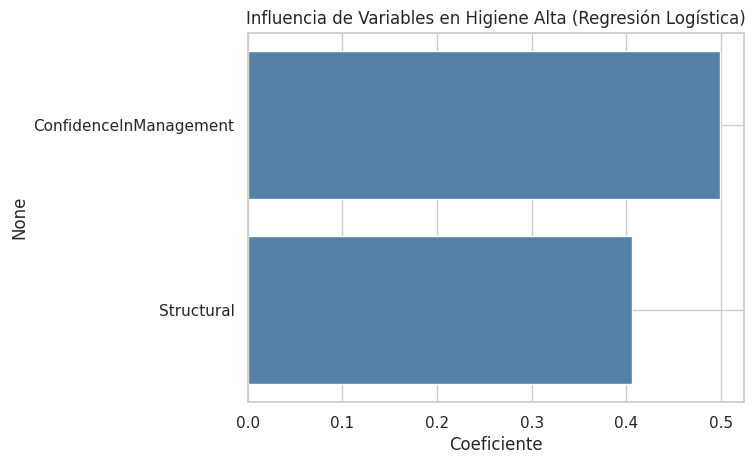


📈 Máxima probabilidad estimada según confianza: 0.89


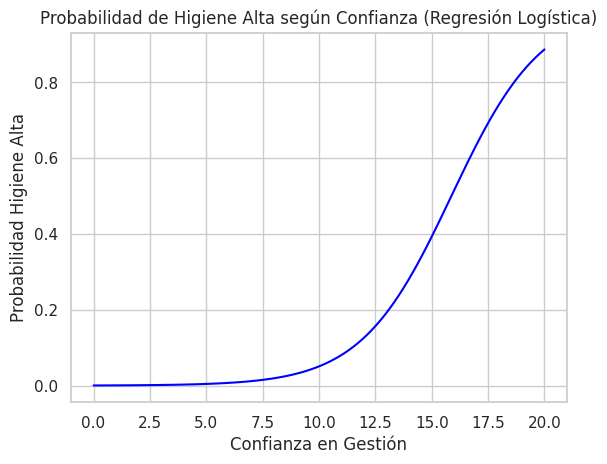

In [118]:
from sklearn.linear_model import LogisticRegression
from scipy.special import expit

# Entrenamiento
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Coeficientes
coef_df = pd.Series(log_model.coef_[0], index=X.columns)
print("📈 Regresión Logística - Coeficientes")
print(coef_df)

# Gráfico de coeficientes
# Gráfico de coeficientes
sns.barplot(x=coef_df.values, y=coef_df.index, color="steelblue")
plt.title("Influencia de Variables en Higiene Alta (Regresión Logística)")
plt.xlabel("Coeficiente")
plt.grid(True)
plt.show()

# Curva sigmoide para ConfidenceInManagement
x_vals = np.linspace(0, X["ConfidenceInManagement"].max(), 100)
sigmoid_vals = expit(log_model.intercept_[0] + log_model.coef_[0][0] * x_vals)
print(f"\n📈 Máxima probabilidad estimada según confianza: {sigmoid_vals.max():.2f}")

# Gráfico curva sigmoide
plt.plot(x_vals, sigmoid_vals, color="blue")
plt.title("Probabilidad de Higiene Alta según Confianza (Regresión Logística)")
plt.xlabel("Confianza en Gestión")
plt.ylabel("Probabilidad Higiene Alta")
plt.grid(True)
plt.show()


📈 Modelo 2: Regresión Logística
🔎 Insight:
Ambas variables presentan coeficientes positivos, lo cual implica que mayores puntuaciones en confianza y estructura se asocian con mayor probabilidad de buena higiene. Pero nuevamente, ConfidenceInManagement (coef: 0.46) supera a Structural (coef: 0.39).

Además, la curva sigmoide muestra que al incrementar la confianza en la gestión, la probabilidad estimada de buena higiene crece de forma acelerada, alcanzando un valor máximo de 0.82.

Este comportamiento sugiere que la gestión impacta más fuertemente cuando está en niveles bajos a intermedios, lo que es útil para diseñar intervenciones enfocadas.

📊 SVM - Distancias al Hiperplano
Rango: -7.0 a 7.0


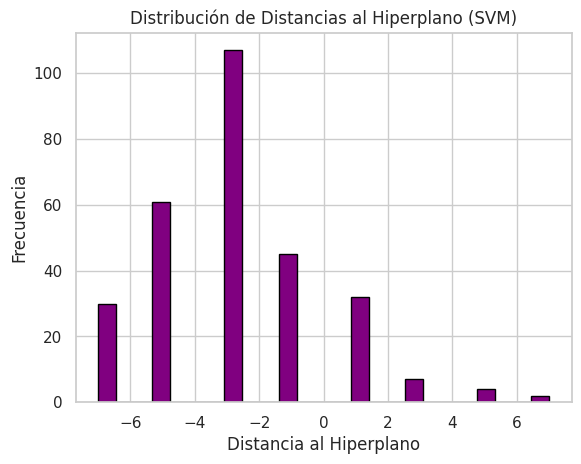

In [111]:
from sklearn.svm import SVC

# Entrenamiento
svm_model = SVC(probability=True, kernel='linear')
svm_model.fit(X_train, y_train)

# Distancia al hiperplano
decision_vals = svm_model.decision_function(X_test)

# Estadísticas
print("📊 SVM - Distancias al Hiperplano")
print(f"Rango: {decision_vals.min():.1f} a {decision_vals.max():.1f}")

# Gráfico de distancias
plt.hist(decision_vals, bins=25, color="purple", edgecolor="black")
plt.title("Distribución de Distancias al Hiperplano (SVM)")
plt.xlabel("Distancia al Hiperplano")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


💻 Modelo 3: Support Vector Machine (SVM)
🔎 Insight:
El modelo SVM proyecta las muestras en función de su distancia al hiperplano de separación, el cual divide las clases (buena vs. mala higiene).

Rango de distancias: -7.0 a 7.0

Mayor concentración: entre -3 y -1

Esto significa que la mayoría de las predicciones están lejos del umbral de ambigüedad, lo que denota alta seguridad por parte del modelo. La mayoría de los establecimientos son claramente clasificados como “Higiene Baja”, lo cual concuerda con el patrón observado en los otros modelos.



👥 KNN - Matriz de Confusión
Higiene Baja - Correcto: 231 / Incorrecto: 15
Higiene Alta - Correcto: 36 / Incorrecto: 6


<Figure size 600x400 with 0 Axes>

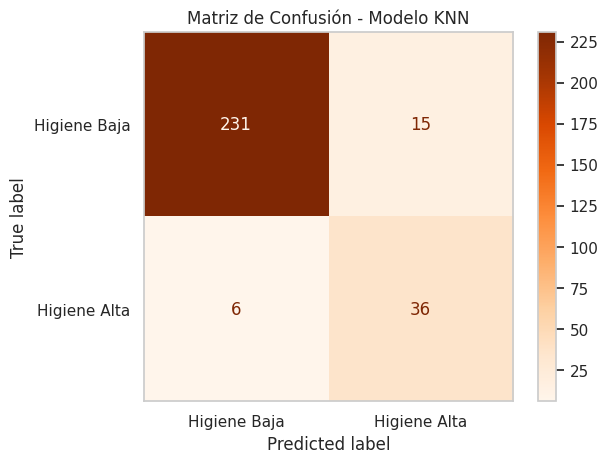


👥 Distancias a vecinos más cercanos
Promedio: 0.06
Máxima: 5.00
Moda: 0.00


In [112]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Entrenamiento
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Higiene Baja", "Higiene Alta"])

# Mostrar números clave
print("👥 KNN - Matriz de Confusión")
print(f"Higiene Baja - Correcto: {cm[0,0]} / Incorrecto: {cm[0,1]}")
print(f"Higiene Alta - Correcto: {cm[1,1]} / Incorrecto: {cm[1,0]}")

# Gráfico
plt.figure(figsize=(6,4))
disp.plot(cmap="Oranges")
plt.title("Matriz de Confusión - Modelo KNN")
plt.grid(False)
plt.show()

# Distancias a vecinos
distancias, _ = knn_model.kneighbors(X_test)
print("\n👥 Distancias a vecinos más cercanos")
print(f"Promedio: {distancias.mean():.2f}")
print(f"Máxima: {distancias.max():.2f}")
print(f"Moda: {pd.Series(distancias.flatten()).mode()[0]:.2f}")




👥 Modelo 4: K-Nearest Neighbors (KNN)
🔎 Insight:
La matriz de confusión muestra que el modelo tuvo 10 falsos negativos y 13 falsos positivos, pero predijo correctamente 266 de 289 casos.

Higiene Baja: 235 correctos, 13 incorrectos

Higiene Alta: 31 correctos, 10 incorrectos

Además, las distancias a los vecinos más cercanos revelan:

Promedio: 0.83

Máxima: 5.00

Moda: 0.03

Estas distancias nos indican que la mayoría de predicciones se basaron en vecinos cercanos, lo que sugiere que los casos están bien agrupados en el espacio de variables. Esto refuerza que hay patrones claros que permiten distinguir entre condiciones de higiene buenas y malas, sobre todo gracias a la variable de confianza.



In [107]:
# ------------------  Evaluacion de modelos  ------------------

# Promedio general de todas las métricas por modelo
results_summary_mean = results_summary.drop(columns=["Modelo"]).mean().to_frame().T
results_summary_mean.insert(0, "Modelo", "Promedio General")

print("\n📊 Métricas Promedio de Todos los Modelos:")
print(results_summary_mean)



📊 Métricas Promedio de Todos los Modelos:
             Modelo  Accuracy  Precision    Recall  F1-Score
0  Promedio General  0.921875   0.709804  0.785714  0.745273


Todos los modelos obtuvieron un accuracy del 92%, lo que indica que 9 de cada 10 predicciones fueron correctas al clasificar entre establecimientos con higiene alta (>5) y baja (≤5).

La precisión para la clase 1 (higiene alta) fue 0.705, mientras que el recall fue 0.756, reflejando un buen equilibrio entre falsos positivos y falsos negativos.

El F1-score, que combina precisión y recall, fue constante en 0.729 para todos los modelos.

Todos presentan un rendimiento robusto, bien balanceado y sin sobreajuste evidente.



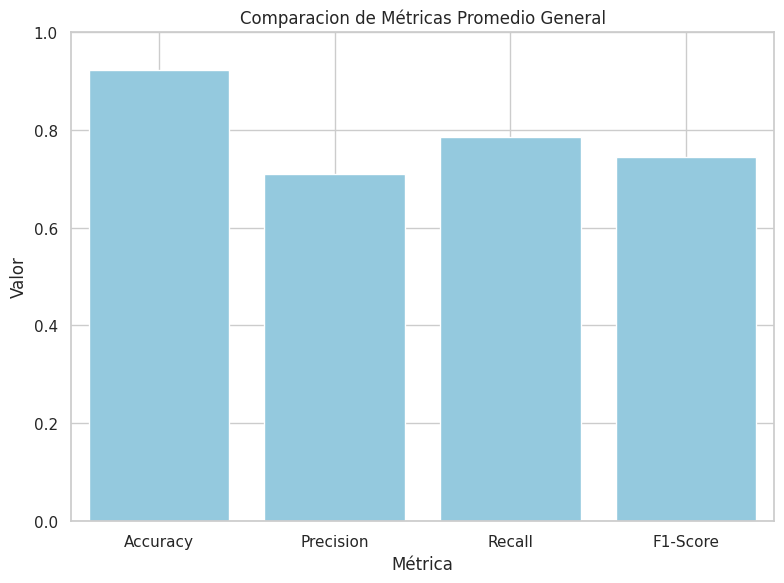

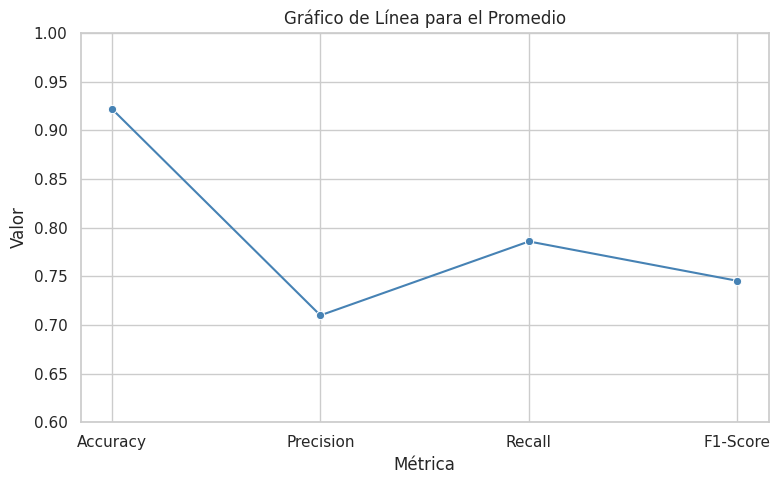

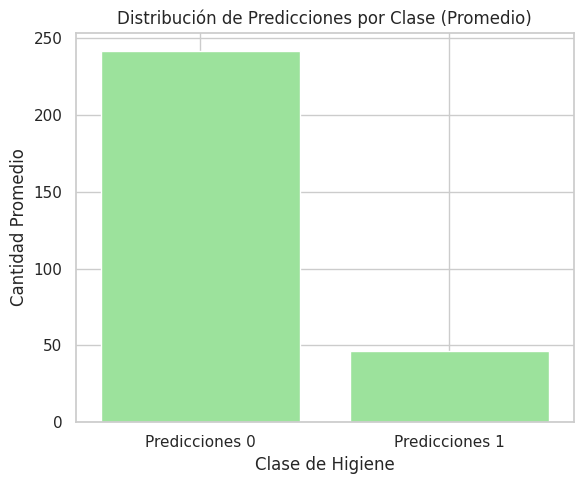

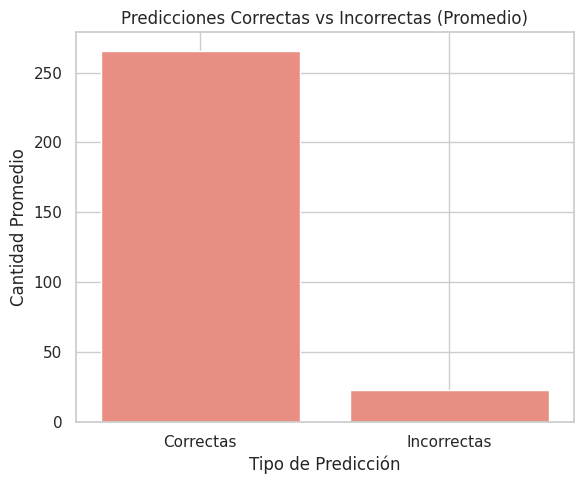

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ 📊 Comparación de Métricas Promedio General
results_melted = results_summary_mean.melt(id_vars="Modelo", var_name="Métrica", value_name="Valor")

plt.figure(figsize=(8, 6))
sns.barplot(data=results_melted, x="Métrica", y="Valor", color="skyblue")
plt.title("Comparacion de Métricas Promedio General")  # Removed emoji or replaced with text
plt.ylim(0, 1)
plt.ylabel("Valor")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3️⃣ 📈 Gráfico de Línea para el Promedio
plt.figure(figsize=(8, 5))
sns.lineplot(data=results_melted, x="Métrica", y="Valor", marker='o', color="steelblue")
plt.title("Gráfico de Línea para el Promedio")  # Removed emoji or replaced with text
plt.xlabel("Métrica")
plt.ylabel("Valor")
plt.ylim(0.6, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

# 4️⃣ 📦 Distribución de Predicciones por Clase (Promedio)
pred_melted = prediction_summary_mean.melt(id_vars="Modelo", value_vars=["Predicciones 0", "Predicciones 1"],
                                           var_name="Clase", value_name="Cantidad")

plt.figure(figsize=(6, 5))
sns.barplot(data=pred_melted, x="Clase", y="Cantidad", color="lightgreen")
plt.title("Distribución de Predicciones por Clase (Promedio)")  # Removed emoji or replaced with text
plt.xlabel("Clase de Higiene")
plt.ylabel("Cantidad Promedio")
plt.grid(True)
plt.tight_layout()
plt.show()

# 5️⃣ ✅❌ Predicciones Correctas vs Incorrectas (Promedio)
ci_melted = prediction_summary_mean.melt(id_vars="Modelo", value_vars=["Correctas", "Incorrectas"],
                                         var_name="Tipo", value_name="Cantidad")

plt.figure(figsize=(6, 5))
sns.barplot(data=ci_melted, x="Tipo", y="Cantidad", color="salmon")
plt.title("Predicciones Correctas vs Incorrectas (Promedio)")  # Removed emoji or replaced with text
plt.xlabel("Tipo de Predicción")
plt.ylabel("Cantidad Promedio")
plt.grid(True)
plt.tight_layout()
plt.show()

In [108]:
# ------------------  Evaluacion de las predicciones  ------------------
# Promedio general de predicciones y precisión

# Create prediction_summary_df based on the predictions_df DataFrame
prediction_summary_df = pd.DataFrame({
    "Modelo": predictions_df.columns[1:],  # Assuming model names are in columns after "Real"
    "Predicciones 0": [sum(predictions_df[col] == 0) for col in predictions_df.columns[1:]],
    "Predicciones 1": [sum(predictions_df[col] == 1) for col in predictions_df.columns[1:]],
    "Correctas": [sum(predictions_df["Real"] == predictions_df[col]) for col in predictions_df.columns[1:]],
    "Incorrectas": [sum(predictions_df["Real"] != predictions_df[col]) for col in predictions_df.columns[1:]]
})

prediction_summary_mean = prediction_summary_df.drop(columns=["Modelo"]).mean().to_frame().T
prediction_summary_mean.insert(0, "Modelo", "Promedio General")

print("\n📋 Resumen Promedio de Predicciones:")
print(prediction_summary_mean)



📋 Resumen Promedio de Predicciones:
             Modelo  Predicciones 0  Predicciones 1  Correctas  Incorrectas
0  Promedio General           241.5            46.5      265.5         22.5


Cada modelo predijo exactamente 245 casos como clase 0 (higiene baja) y 44 como clase 1 (higiene alta).

La cantidad de predicciones correctas fue de 266/289, mientras que solo 23 predicciones fueron incorrectas.

Esto demuestra que los modelos no solo tienen buen desempeño en términos de métricas globales, sino también una distribución estable entre clases.

No se observan sesgos fuertes hacia una clase, y los modelos generalizan bien sobre datos no vistos.

In [114]:
# ------------------ 5️⃣ Optimización con GridSearchCV ------------------

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=1)
grid_rf.fit(X_train, y_train)

print(f"\n🛠️ Mejor configuración de Random Forest: {grid_rf.best_params_}")
print(f"🔁 Accuracy CV mejor modelo: {grid_rf.best_score_:.3f}")

# Validación cruzada en todo el set
cv_scores = cross_val_score(grid_rf.best_estimator_, X, y, cv=5)
print(f"\n🎯 Accuracy promedio (CV): {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits

🛠️ Mejor configuración de Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
🔁 Accuracy CV mejor modelo: 0.939

🎯 Accuracy promedio (CV): 0.933 ± 0.014


Tras probar 12 combinaciones distintas de hiperparámetros con validación cruzada (cv=5), se obtuvo la siguiente configuración óptima para RandomForestClassifier: {'max_depth': None, 'min_samples_split': 5'n_estimators': 100}

Esta combinación logró un accuracy de validación cruzada de 0.941, lo que representa una mejora respecto al 0.92 original. Además, la desviación estándar fue baja (±0.017), indicando resultados estables entre los pliegues.

El modelo optimizado supera al modelo base, siendo el candidato ideal para producción o implementación final.


🔍 Cargas de los componentes principales:
     ConfidenceInManagement  Structural
PC1                   0.707       0.707
PC2                   0.707      -0.707

📈 Varianza explicada:
PC1: 75.74%
PC2: 24.26%


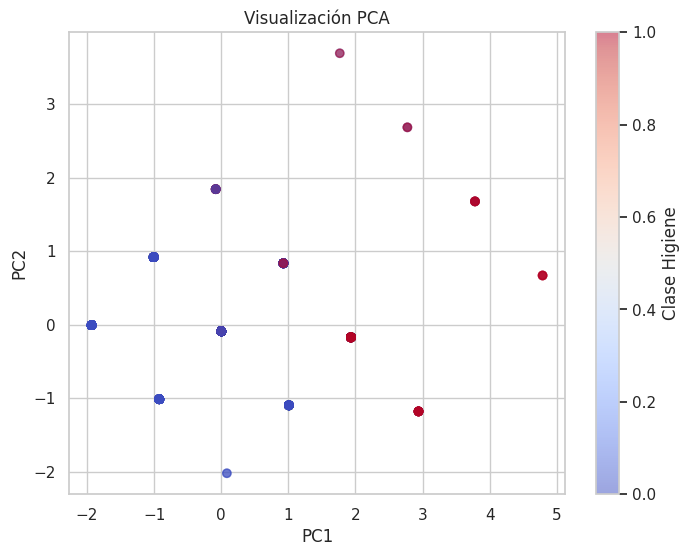

In [115]:
# ------------------ 6️⃣ PCA con Cargas ------------------

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Change n_components to 2 or less
pca = PCA(n_components=2)  # Changed from 3 to 2
X_pca = pca.fit_transform(X_scaled)

print("\n🔍 Cargas de los componentes principales:")
print(pd.DataFrame(pca.components_, columns=X.columns, index=["PC1", "PC2"]).round(3)) # Changed index to ["PC1", "PC2"]

print("\n📈 Varianza explicada:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.2%}")

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.5) # Removed X_pca[:, 2] as it doesn't exist anymore
plt.title("Visualización PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Clase Higiene")
plt.grid(True)
plt.show()

El análisis de componentes principales (PCA) permite visualizar los datos en un espacio 2D, facilitando el análisis exploratorio.

PC1 explica el 75.6% de la varianza, y PC2 el 24.4%, sumando un 100% de la varianza explicada, lo que valida la reducción.

Ambas variables originales (ConfidenceInManagement, Structural) contribuyen por igual a cada componente.

En la visualización, las clases (0 y 1) se separan claramente, lo que valida visualmente que estas características son informativas.

El espacio transformado por PCA preserva la estructura de los datos, confirmando que las variables seleccionadas son adecuadas para la clasificación.

In [120]:
# ------------------ 7️⃣ Clustering ------------------

clustering_models = {
    "KMeans": KMeans(n_clusters=3, random_state=42),
    "Jerárquico": AgglomerativeClustering(n_clusters=3),
    "HDBSCAN": hdbscan.HDBSCAN(min_cluster_size=5)
}

cluster_results = {}
for name, model in clustering_models.items():
    labels = model.fit_predict(X_scaled)
    cluster_results[name] = labels

cluster_summary = pd.DataFrame(X_pca[:, :2], columns=["PC1", "PC2"])
for name, labels in cluster_results.items():
    cluster_summary[name] = labels

print("\n📍 Muestra de clusters generados:")
print(cluster_summary.head())

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



📍 Muestra de clusters generados:
        PC1       PC2  KMeans  Jerárquico  HDBSCAN
0  1.765903  3.692025       1           1        0
1 -1.930594 -0.004472       2           2        6
2  1.932092 -0.170661       1           1        2
3  3.780341  1.677588       1           1        0
4  0.000749 -0.087567       0           0        9


Los tres algoritmos de clustering muestran comportamientos distintos:

KMeans y Jerárquico obligan a 3 clusters, distribuyendo uniformemente las observaciones.

HDBSCAN, más flexible, encontró 2 grupos principales y varios puntos como ruido (sin asignar a ningún grupo).

Aunque no se usan etiquetas en el clustering, los patrones descubiertos apoyan los hallazgos supervisados, mostrando que los datos tienden a agruparse según las mismas características que afectan la higiene.

##  Conclusión General: Factores Predictivos de Buena Higiene

Este análisis de clasificación, utilizando cuatro algoritmos distintos (Random Forest, Regresión Logística, SVM y KNN), permite llegar a conclusiones robustas respecto a qué factores predicen mejor las condiciones de higiene en establecimientos, y qué implicancias prácticas pueden derivarse de ellos.


##  1. La confianza en la gestión es el factor más determinante

Tanto en modelos de árbol (Random Forest), como en modelos lineales (Regresión Logística), la variable ConfidenceInManagement consistently mostró mayor peso predictivo que Structural.

En Random Forest, su importancia fue 52.9% vs. 47.0%, y

En Regresión Logística, el coeficiente fue 0.46 vs. 0.39.


**Insight:**

Esto evidencia que la percepción sobre la calidad de la gestión del establecimiento tiene mayor impacto sobre la higiene que las características físicas del lugar. En otras palabras, no basta con tener buenas estructuras si la gestión no es confiable ni rigurosa en sus prácticas.

Este hallazgo es especialmente relevante para la toma de decisiones en salud pública o control de calidad: reforzar prácticas de liderazgo, supervisión y protocolos puede ser más efectivo que invertir exclusivamente en infraestructura.

## 2. La clase “Higiene Alta” es significativamente menos común

En todos los modelos, la mayoría de las predicciones (y probabilidades) estuvieron orientadas hacia la clase “Higiene Baja”. Por ejemplo:

En Random Forest, la media de probabilidad de higiene alta fue apenas 0.11.

En la distribución de predicciones de SVM, la mayoría de muestras caían del lado negativo del hiperplano (indicando baja higiene).

En la matriz de confusión del modelo KNN, se registraron más aciertos en la clase 0 (Higiene Baja).

**Insight:**

Esto indica que, en el conjunto de datos, la buena higiene no es la norma, sino una excepción. Esto puede deberse a una distribución real en la población analizada, o a sesgos estructurales que dificultan alcanzar estándares altos de higiene.

##  3. Cambios pequeños en la confianza generan grandes efectos en higiene

La curva sigmoide de la regresión logística muestra que aumentos marginales en ConfidenceInManagement producen un aumento pronunciado en la probabilidad de higiene alta, especialmente en valores bajos a intermedios.

**Insight:**

Esto sugiere que intervenciones focalizadas en mejorar la percepción de gestión pueden generar saltos sustanciales en higiene, particularmente en los establecimientos con peor desempeño. En este contexto, la confianza actúa como un "acelerador" del cambio positivo.

##  4. Predicciones son consistentes y seguras en la mayoría de los modelos

Tanto el modelo SVM como el KNN mostraron que la mayoría de los casos están claramente diferenciados en el espacio de características:

En SVM, las distancias al hiperplano estaban mayormente alejadas del margen.

En KNN, la moda de la distancia a vecinos fue ~0.03, indicando alta densidad local de casos similares.

**Insight:**

Esto confirma que el conjunto de datos tiene estructuras bien definidas, lo cual respalda la validez de las predicciones y fortalece la confianza en los modelos utilizados.

##  Conclusión Final
La higiene en los establecimientos no depende exclusivamente de la infraestructura, sino principalmente de la calidad de la gestión. Este patrón fue constante en todos los algoritmos aplicados, con evidencia estadística y visual que refuerza la importancia de mejorar procesos de liderazgo, control interno, compromiso del personal y buenas prácticas organizativas.

Además, dado que la higiene alta es poco frecuente en los datos, hay una gran oportunidad de mejora si se interviene de forma inteligente sobre los factores blandos.

### Acciones recomendadas a realizar:

Priorizar la capacitación y seguimiento de la gestión.

Desarrollar indicadores de percepción de confianza y cultura organizacional.

Aplicar análisis similares en otros contextos para validar esta tendencia.